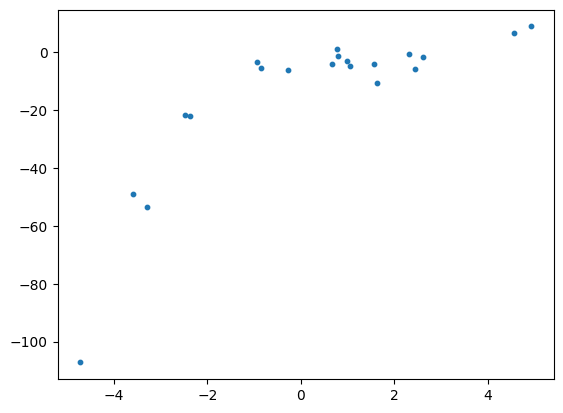

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

In [8]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

x = x[:, np.newaxis]
y = y[:, np.newaxis]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
# y_pred

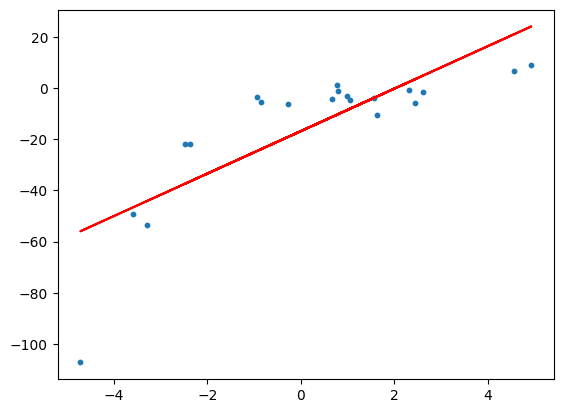

In [3]:
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

### We can see that the straight line is unable to capture the patterns in the data. This is an example of under-fitting. Computing the RMSE and R²-score of the linear line gives:

In [13]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y, y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Root Mean Squared Error (RMSE): 15.908242501429998
R-squared (R2) Score: 0.6386750054827146


### To overcome under-fitting, we need to increase the complexity of the model.


To generate a higher order equation we can add powers of the original features as new features. The linear model,
This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.

Root Mean Squared Error (RMSE): 10.120437473614713
R-squared (R2) Score: 0.8537647164420812


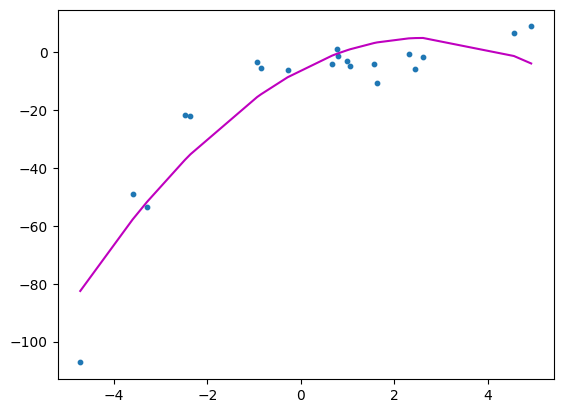

In [17]:
import operator
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

### We can see that RMSE has decreased and R²-score has increased as compared to the linear line.

#### If we try to fit a cubic curve (degree=3) to the dataset, we can see that it passes through more data points than the quadratic and the linear plots.

Root Mean Squared Error (RMSE): 3.4498955074087267
R-squared (R2) Score: 0.9830071790386677


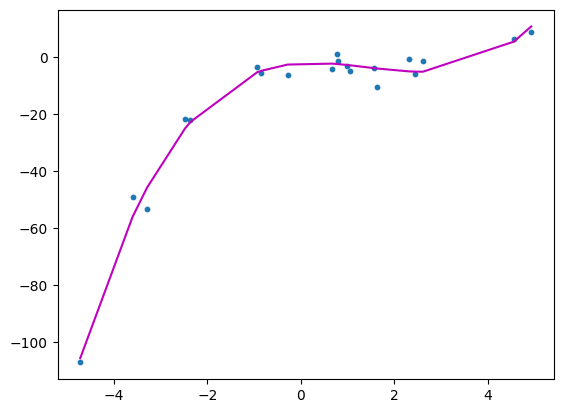

In [18]:

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

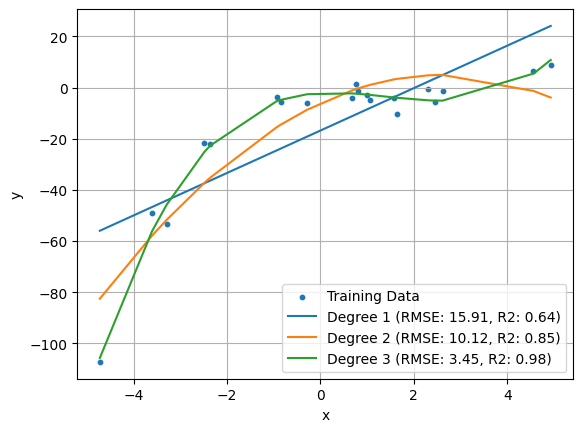

In [23]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Plot the training dataset
plt.scatter(x, y, s=10, label='Training Data')

# Fit and plot polynomial models for degrees 1, 2, and 3
for degree in [1, 2, 3]:
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    # Calculate RMSE and R-squared score
    rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
    r2 = r2_score(y, y_poly_pred)

    # Sort the values of x before line plot
    sort_axis = np.argsort(x.flatten())
    x_sorted = x.flatten()[sort_axis]
    y_poly_pred_sorted = y_poly_pred[sort_axis]

    # Plot the fitted polynomial line
    label = f'Degree {degree} (RMSE: {rmse:.2f}, R2: {r2:.2f})'
    plt.plot(x_sorted, y_poly_pred_sorted, label=label)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


```python
sort_axis = np.argsort(x.flatten())
```

In this line, `x.flatten()` converts the 2-dimensional array `x` into a 1-dimensional array (flattens it), which is necessary for sorting. Then, `np.argsort(x.flatten())` returns the indices that would sort the flattened array `x`. In other words, it returns an array of indices that represent the sorted order of the elements in `x`.

Suppose `x` is a 2-dimensional array as follows:

```
x = [[5],
     [1],
     [3]]
```

Flattening `x` using `x.flatten()` would result in a 1-dimensional array:

```
x.flatten() = [5, 1, 3]
```

Now, if we apply `np.argsort(x.flatten())`, it will give us the sorted indices:

```
np.argsort(x.flatten()) = [1, 2, 0]
```

This means that the element with index 1 (which is 1 in the original array) comes first after sorting, followed by the element with index 2 (which is 3 in the original array), and finally, the element with index 0 (which is 5 in the original array).

The next two lines use these sorted indices to rearrange the elements of `x` and `y_poly_pred` in ascending order:

```python
x_sorted = x.flatten()[sort_axis]
y_poly_pred_sorted = y_poly_pred[sort_axis]
```

Since `sort_axis` contains the indices of the sorted order, `x.flatten()[sort_axis]` will give us the elements of `x` in sorted order, and `y_poly_pred[sort_axis]` will give us the corresponding elements of `y_poly_pred` in the same sorted order.

This sorting is necessary when plotting the fitted polynomial lines because we want the data points to be connected in the correct order to create a smooth line. Without sorting, the line might not be displayed in the right order, leading to a distorted plot.

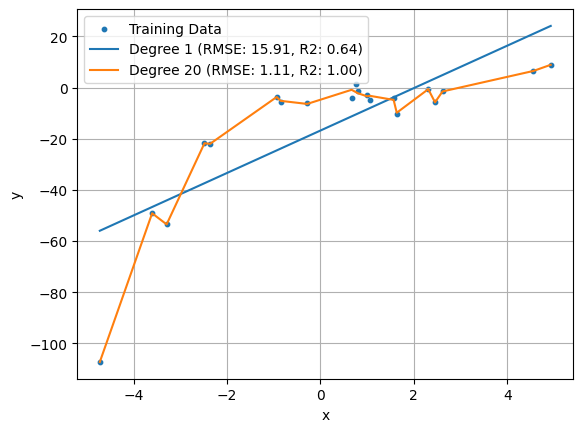

In [25]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Plot the training dataset
plt.scatter(x, y, s=10, label='Training Data')

# Fit and plot polynomial models for degrees 1, 2, and 3
for degree in [1, 20]:
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    # Calculate RMSE and R-squared score
    rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
    r2 = r2_score(y, y_poly_pred)

    # Sort the values of x before line plot
    sort_axis = np.argsort(x.flatten())
    x_sorted = x.flatten()[sort_axis]
    y_poly_pred_sorted = y_poly_pred[sort_axis]

    # Plot the fitted polynomial line
    label = f'Degree {degree} (RMSE: {rmse:.2f}, R2: {r2:.2f})'
    plt.plot(x_sorted, y_poly_pred_sorted, label=label)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


### For degree=20, the model is also capturing the noise in the data. This is an example of over-fitting. Even though this model passes through most of the data, it will fail to generalize on unseen data.

To prevent over-fitting, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized. ( Note: adding more data can be an issue if the data is itself noise).

![Cat Image](PR.webp)
